# Natural Language Processing with Disaster Tweets

competition: https://www.kaggle.com/competitions/nlp-getting-started/overview

code: https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Presenting text as numerical data

In [2]:
# Sample text for training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [3]:
# Import CountVectorizer and create an instnace of it
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# Fit the CountVectorizer to the training data
vect.fit(simple_train)

# Transform the text messages in the training data to a document-term matrix
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [4]:
# Transform the text messages in the training data to a document-term matrix
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm


<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [5]:
# Convert the sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [6]:
# Examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns = vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [7]:
# Check the type of the document-term matrix
print(type(simple_train_dtm))

<class 'scipy.sparse._csr.csr_matrix'>


In [8]:
# Print the sparse matrix
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [9]:
# Example text for model testing
simple_test = ["Please don't call me"]

In [10]:
# Transform the test data to a document-term matrix
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [11]:
# Exmain vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns = vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


## Reading a text-based dataset to pandas

In [12]:
# read file into pandas using a relative path
sms = pd.read_csv('~/aiffel/data/spam.csv', encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']

sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🔍 Exploratory Data Analysis (EDA)

In [13]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
# Convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham': 0, 'spam': 1})
sms

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [17]:
sms['message_len'] = sms.message.apply(len)
sms

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


<Axes: xlabel='message_len', ylabel='Count'>

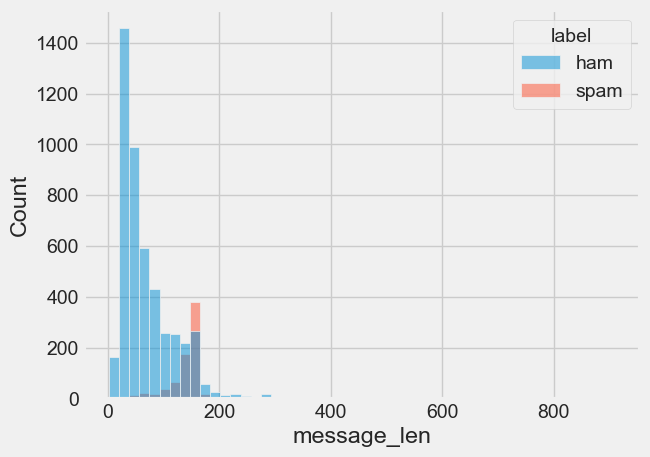

In [21]:
sns.histplot(data = sms, x = 'message_len', kde=False, bins=50, hue=sms.label)